#### Competition Description
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Practice Skills
Binary classification
Python and R basics

#### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each in the test set, you must predict a 0 or 1 value for the variable.

#### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

Submission File Format
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)
PassengerId,Survived
 892,0
 893,1
 894,0
 Etc.
You can download an example submission file (gender_submission.csv) on the Data page.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_set = pd.read_csv("./train.csv")
test_set = pd.read_csv("./train.csv")

In [18]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# distribution impression
import matplotlib.pyplot as plt
%matplotlib inline

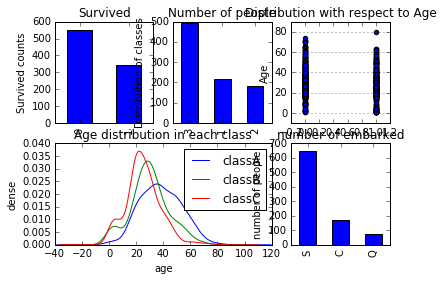

In [38]:
fig = plt.figure()
fig.set(alpha=.2)

plt.subplot2grid((2,3),(0,0))
train_set.Survived.value_counts().plot(kind="bar")
plt.title("Survived")
plt.ylabel("Survived counts")
#plt.show()

plt.subplot2grid((2,3),(0,1))
train_set.Pclass.value_counts().plot(kind="bar")
plt.title("Number of people")
plt.ylabel("Distribution of classes")
#plt.show()

plt.subplot2grid((2,3),(0,2))
plt.scatter(train_set.Survived, train_set.Age)
plt.grid(b=True, which="major", axis="y")
plt.title("Distribution with respect to Age")
plt.ylabel("Age")
#plt.show()

plt.subplot2grid((2,3),(1,0), colspan=2)
train_set.Age[train_set.Pclass==1].plot(kind="kde")
train_set.Age[train_set.Pclass==2].plot(kind="kde")
train_set.Age[train_set.Pclass==3].plot(kind="kde")
plt.xlabel("age")
plt.ylabel("dense")
plt.title("Age distribution in each class")
plt.legend(("classA","classB","classC"), loc="best")
#plt.show()

plt.subplot2grid((2,3),(1,2))
train_set.Embarked.value_counts().plot(kind="bar")
plt.title("number of embarked")
plt.ylabel("number of people")
plt.show()

In [28]:
fig = plt.figure()
fig.set(alpha=.2)
Survived = train_set.Pclass[train_set.Survived==1].value_counts()
Dead = train_set.Pclass[train_set.Survived==0].value_counts()

In [30]:
df = pd.DataFrame({"s":Survived, "d":Dead})

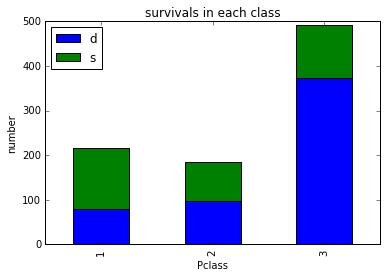

In [37]:
df.plot(kind="bar", stacked=True)
plt.title("survivals in each class")
plt.xlabel("Pclass")
plt.ylabel("number")
plt.show()

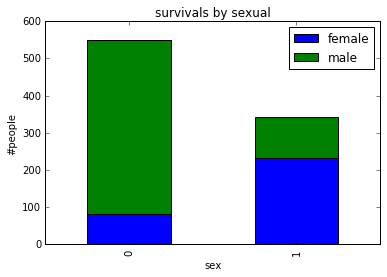

In [39]:
fig = plt.figure()
fig.set(alpha=.2)
Survived_m = train_set.Survived[train_set.Sex=="male"].value_counts()
Survived_f = train_set.Survived[train_set.Sex=="female"].value_counts()
df = pd.DataFrame({"male":Survived_m, "female":Survived_f})
df.plot(kind="bar", stacked=True)
plt.title("survivals by sexual")
plt.xlabel("sex")
plt.ylabel("#people")
plt.show()